<a href="https://colab.research.google.com/github/sanchalee19/Hand-Written-Digit-Classification-Project/blob/main/Hand_written_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [2]:
import tensorflow     #library
from tensorflow import keras      #keras is a tf API used to build and train neural networks
from tensorflow.keras import Sequential              #allows to build neural netwrok layer by layer
from tensorflow.keras.layers import Dense,Flatten       #Imports the Dense and Flatten layers from Keras, which are commonly used in neural network architectures.

# BASIC OPERATIONS

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape          #contains 60k images

(60000, 28, 28)

In [5]:
y_train.shape          #contains 60k labels (numbers)

(60000,)

In [6]:
X_test.shape           #contains 10k images

(10000, 28, 28)

In [7]:
y_test.shape           #contains 10k lables (numbers)

(10000,)

In [8]:
y_train       #just a 1D array containing nos 0 - 9 60k times

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_test        # just a 1D array containing nos 0 - 9 10k times

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#SAMPLE IMAGE

Displays the 3rd image present in the training dataset.
Matplotlib is a popular plotting library in Python.
imshow() is a function for displaying images in Matplotlib.

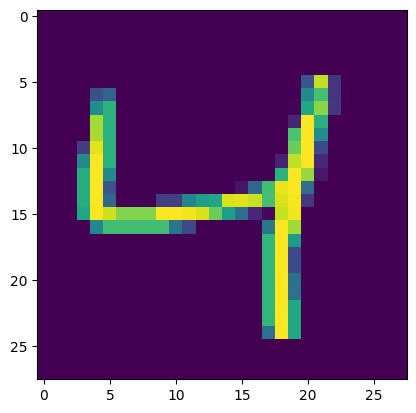

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])                  #2nd image of x_train.

# SCALING
Grey scale images like those present in mnist dataset ranges from 0 to 255 pixels. 0 - black , 255 - white. Therefore, by dividing X_train and X_test by 255, the code is effectively scaling the pixel values of the images in both datasets to the range [0, 1], which is a common practice for preprocessing image data before feeding it into a neural network model for training.

Note: y_train and y_test are not scaled because they are numbers(text) and not images.

In [11]:
X_train = X_train/255          # scaling/normalization
X_test = X_test/255            # between 0-1 to increase performance

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# MAKING THE NEURAL NETWORK

First use flatten to convert 2D to 1D as there are going to be total 784(28*28) nodes which are going to take values of each pixel but we have input in the form 28x28 so to make it in a vector format we use flatten function.

The first two Dense layers have ReLU (Rectified Linear Unit) activation functions, which introduce non-linearity into the model and help the network learn complex patterns in the data.

The last Dense layer has a softmax activation function, which is commonly used in multi-class classification problems.



In [13]:
model = Sequential()                           #function to build nn layer by layer

model.add(Flatten(input_shape=(28,28)))       #input layer
model.add(Dense(128,activation='relu'))       #hidden layer 1
model.add(Dense(32,activation='relu'))        #hidden layer 2
model.add(Dense(10,activation='softmax'))     #output layer

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#COMPILE & TRAIN THE MODEL

The model.compile() function in Keras is used to configure the model for training. It specifies the loss function, the optimizer, and the metrics to monitor during training.

sparse_categorical_crossentropy : used when we haven't performed one hot encoding (0-9)

Optimizers are used for updating the model weights during training.

metrics: specifies the metrics to monitor during training and evaluation.

In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0504 - accuracy: 0.9836 - val_loss: 0.0926 - val_accuracy: 0.9737
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0410 - accuracy: 0.9867 - val_loss: 0.1019 - val_accuracy: 0.9744
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0343 - accuracy: 0.9892 - val_loss: 0.1008 - val_accuracy: 0.9734
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.1032 - val_accuracy: 0.9728
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.1107 - val_accuracy: 0.9726
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.1069 - val_accuracy: 0.9737
Epoch 7/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0167 - accuracy: 0.9942 - val_loss: 0.1158 - val_accuracy:

#TESTING

y_prob will contain the predicted class probabilities for each sample in the test dataset according to the trained model. These probabilities can be used for further analysis, such as evaluating the model's confidence in its predictions, or for computing metrics like accuracy or precision.

In [20]:
y_prob = model.predict(X_test)                    # probability of each digit for 10k images.


313/313 [==============================] - 1s 2ms/step


Probability of 1st image being a 0 is 6.8, 1 is 5.2 and so on

In [21]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[4.02270365e-19, 3.39418543e-17, 1.94864292e-15, ...,
        9.99999940e-01, 4.70265345e-21, 1.25157631e-14],
       [1.06112120e-30, 1.67708932e-14, 9.99999940e-01, ...,
        2.81301573e-20, 4.22623306e-22, 6.61974123e-38],
       [4.72287445e-15, 9.99999940e-01, 1.55379824e-11, ...,
        3.91878423e-08, 1.17509932e-10, 9.53126619e-15],
       ...,
       [5.01976760e-31, 1.28759589e-23, 3.55078734e-31, ...,
        3.78147017e-14, 3.79817751e-24, 1.09692862e-11],
       [1.23449504e-24, 1.03114858e-31, 0.00000000e+00, ...,
        3.29619389e-29, 2.69759844e-17, 1.01946625e-23],
       [1.97341575e-18, 1.12760624e-17, 7.90234435e-19, ...,
        2.40390558e-29, 1.75500491e-18, 3.47348565e-31]], dtype=float32)



---



The line y_pred = y_prob.argmax(axis=1) takes the predicted probabilities generated by the model (y_prob) and extracts the class labels with the highest probability for each sample.

eg. for the first test image the highest probability predicted by the model is 9.99 and it is for 7. So acc to model 1st test image is 7.


In [22]:
y_pred = y_prob.argmax(axis=1)

In [24]:
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

#ACCURACY

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9793

#PLOTTING TRAINING AND VALIDATION LOSS

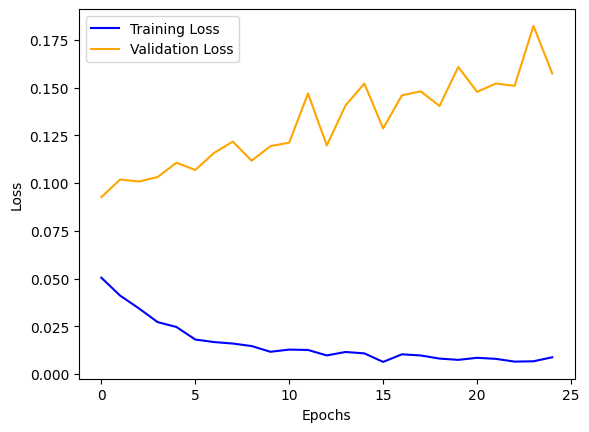

In [26]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#PLOTTING TRAINING AND VALIDATION ACCURACY

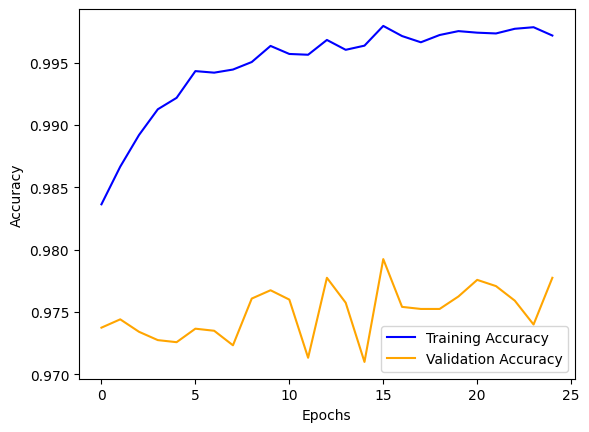

In [27]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#TRIAL

8th image of X_test is 9, and the model gives predicted output as 9 which is correct.

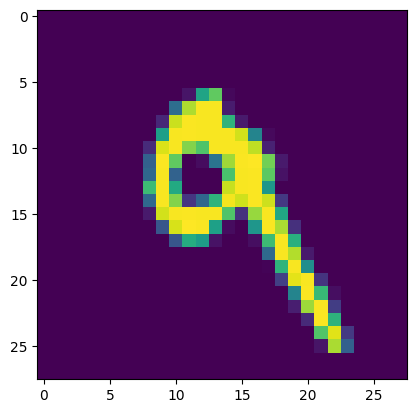

In [28]:
plt.imshow(X_test[7])

In [29]:
model.predict(X_test[7].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([9])